<a href="https://colab.research.google.com/github/Davron030901/TensorFlow-and-Keras/blob/main/Keylogger_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, roc_curve, auc
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import warnings
warnings.filterwarnings('ignore')

# 2. Load dataset

In [ ]:
!pip install kagglehub[pandas-datasets]

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter


In [ ]:
# Load a DataFrame with a specific version of a CSV
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "subhajournal/keylogger-detection/versions/0",
    "Keylogger_Detection.csv",
)

100%|██████████| 79.4M/79.4M [00:00<00:00, 93.0MB/s]

Extracting zip of Keylogger_Detection.csv...


In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
df

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,0,10.42.0.211-52.6.25.230-34451-443-6,10.42.0.211,34451.0,52.6.25.230,443.0,6.0,04/08/2017 05:12:36,12140931.0,9.0,6.0,334.0,3664.0,208.0,0.0,37.111111,76.440245,1448.0,0.0,610.666667,703.223341,3.292993e+02,1.235490,8.672094e+05,3.179603e+06,11914164.0,19.0,12140931.0,1.517616e+06,4.200924e+06,11914164.0,67.0,161697.0,3.233940e+04,46705.624402,104919.0,19.0,0.0,0.0,0.0,0.0,296.0,200.0,0.741294,0.494196,0.0,1448.0,249.875000,501.347368,251349.183333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,266.533333,37.111111,610.666667,296.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,334.0,6.0,3664.0,65535.0,119.0,2.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.3.99-10.42.0.151-443-53892-6,10.42.0.151,53892.0,172.217.3.99,443.0,6.0,04/08/2017 07:55:51,418882.0,102.0,203.0,829.0,279509.0,517.0,0.0,8.127451,57.270709,1418.0,0.0,1376.891626,236.306937,6.692529e+05,728.128685,1.377901e+03,6.067904e+03,76788.0,4.0,413474.0,4.093802e+03,1.195078e+04,83738.0,5.0,382119.0,1.891678e+03,7744.797347,80599.0,4.0,0.0,0.0,0.0,0.0,3272.0,6504.0,243.505331,484.623355,0.0,1418.0,916.137255,676.644087,457847.220444,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,919.140984,8.127451,1376.891626,3272.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,829.0,203.0,279509.0,65535.0,175.0,3.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.3.98-10.42.0.151-443-50750-6,172.217.3.98,443.0,10.42.0.151,50750.0,6.0,04/08/2017 08:48:19,45.0,2.0,0.0,55.0,0.0,55.0,0.0,27.500000,38.890873,0.0,0.0,0.000000,0.000000,1.222222e+06,44444.444444,4.500000e+01,0.000000e+00,45.0,45.0,45.0,4.500000e+01,0.000000e+00,45.0,45.0,0.0,0.000000e+00,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,64.0,0.0,44444.444444,0.000000,0.0,55.0,36.666667,31.754265,1008.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,55.000000,27.500000,0.000000,64.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,55.0,0.0,0.0,179.0,-1.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,10.42.0.211-10.42.0.1-23025-53-17,10.42.0.211,23025.0,10.42.0.1,53.0,17.0,04/08/2017 05:54:10,541699.0,1.0,1.0,39.0,225.0,39.0,39.0,39.000000,0.000000,225.0,225.0,225.000000,0.000000,4.873555e+02,3.692087,5.416990e+05,0.000000e+00,541699.0,541699.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,32.0,32.0,1.846044,1.846044,39.0,225.0,101.000000,107.38715,11532.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,151.500000,39.000000,225.000000,32.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39.0,1.0,225.0,-1.0,-1.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,10.42.0.211-123.129.244.226-52602-443-6,10.42.0.211,52602.0,123.129.244.226,443.0,6.0,04/08/2017 08:44:25,7310795.0,3.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523617 entries, 0 to 523616
Data columns (total 86 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    523617 non-null  int64  
 1   Flow ID                       523610 non-null  object 
 2    Source IP                    523617 non-null  object 
 3    Source Port                  523617 non-null  float64
 4    Destination IP               523617 non-null  object 
 5    Destination Port             523617 non-null  float64
 6    Protocol                     523617 non-null  float64
 7    Timestamp                    523617 non-null  object 
 8    Flow Duration                523617 non-null  float64
 9    Total Fwd Packets            523617 non-null  float64
 10   Total Backward Packets       523617 non-null  float64
 11  Total Length of Fwd Packets   523617 non-null  float64
 12   Total Length of Bwd Packets  523617 non-nul

In [ ]:
df.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

# 3. Rename columns (ustun nomlarini o'zgartirish)

In [ ]:
df.columns = [
    'Unnamed_0', 'Flow_ID', 'Source_IP', 'Source_Port', 'Destination_IP', 'Destination_Port',
    'Protocol', 'Timestamp', 'Flow_Duration', 'Total_Fwd_Packets', 'Total_Backward_Packets',
    'Total_Length_Fwd_Packets', 'Total_Length_Bwd_Packets', 'Fwd_Packet_Length_Max',
    'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean', 'Fwd_Packet_Length_Std',
    'Bwd_Packet_Length_Max', 'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
    'Bwd_Packet_Length_Std', 'Flow_Bytes_s', 'Flow_Packets_s', 'Flow_IAT_Mean',
    'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Mean',
    'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean',
    'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
    'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length', 'Bwd_Header_Length',
    'Fwd_Packets_s', 'Bwd_Packets_s', 'Min_Packet_Length', 'Max_Packet_Length',
    'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
    'SYN_Flag_Count', 'RST_Flag_Count', 'PSH_Flag_Count', 'ACK_Flag_Count',
    'URG_Flag_Count', 'CWE_Flag_Count', 'ECE_Flag_Count', 'Down_Up_Ratio',
    'Average_Packet_Size', 'Avg_Fwd_Segment_Size', 'Avg_Bwd_Segment_Size',
    'Fwd_Header_Length_1', 'Fwd_Avg_Bytes_Bulk', 'Fwd_Avg_Packets_Bulk',
    'Fwd_Avg_Bulk_Rate', 'Bwd_Avg_Bytes_Bulk', 'Bwd_Avg_Packets_Bulk',
    'Bwd_Avg_Bulk_Rate', 'Subflow_Fwd_Packets', 'Subflow_Fwd_Bytes',
    'Subflow_Bwd_Packets', 'Subflow_Bwd_Bytes', 'Init_Win_bytes_forward',
    'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
    'Active_Mean', 'Active_Std', 'Active_Max', 'Active_Min', 'Idle_Mean',
    'Idle_Std', 'Idle_Max', 'Idle_Min', 'Class'
]

In [ ]:
print(df.describe())

           Unnamed_0    Source_Port  Destination_Port       Protocol  \
count  523617.000000  523617.000000     523617.000000  523617.000000   
mean   261808.000000   38389.622917       6222.747054       8.435195   
std    151155.352288   18713.642457      15681.211329     157.569965   
min         0.000000       0.000000          0.000000       0.000000   
25%    130904.000000   34019.000000         80.000000       6.000000   
50%    261808.000000   43186.000000        443.000000       6.000000   
75%    392712.000000   52281.000000        443.000000       6.000000   
max    523616.000000  124560.000000      65428.000000   65812.000000   

       Flow_Duration  Total_Fwd_Packets  Total_Backward_Packets  \
count   5.236170e+05      523617.000000           523617.000000   
mean    1.116307e+07           9.475619               17.819533   
std     2.307145e+07          97.897284              321.858169   
min     0.000000e+00           0.000000                0.000000   
25%     3.730600

In [ ]:
df.drop('Unnamed_0', axis=1, inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(321452)

In [ ]:
df = df.dropna()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202158 entries, 0 to 202157
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Flow_ID                   202158 non-null  object 
 1   Source_IP                 202158 non-null  object 
 2   Source_Port               202158 non-null  float64
 3   Destination_IP            202158 non-null  object 
 4   Destination_Port          202158 non-null  float64
 5   Protocol                  202158 non-null  float64
 6   Timestamp                 202158 non-null  object 
 7   Flow_Duration             202158 non-null  float64
 8   Total_Fwd_Packets         202158 non-null  float64
 9   Total_Backward_Packets    202158 non-null  float64
 10  Total_Length_Fwd_Packets  202158 non-null  float64
 11  Total_Length_Bwd_Packets  202158 non-null  float64
 12  Fwd_Packet_Length_Max     202158 non-null  float64
 13  Fwd_Packet_Length_Min     202158 non-null  f

In [ ]:
df.columns

Index(['Flow_ID', 'Source_IP', 'Source_Port', 'Destination_IP',
       'Destination_Port', 'Protocol', 'Timestamp', 'Flow_Duration',
       'Total_Fwd_Packets', 'Total_Backward_Packets',
       'Total_Length_Fwd_Packets', 'Total_Length_Bwd_Packets',
       'Fwd_Packet_Length_Max', 'Fwd_Packet_Length_Min',
       'Fwd_Packet_Length_Mean', 'Fwd_Packet_Length_Std',
       'Bwd_Packet_Length_Max', 'Bwd_Packet_Length_Min',
       'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_Bytes_s',
       'Flow_Packets_s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max',
       'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std',
       'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean',
       'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags',
       'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets_s', 'Bwd_Packets_s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       '

In [ ]:
df.describe()

,Source_Port,Destination_Port,Protocol,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_Fwd_Packets,Total_Length_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_s,Flow_Packets_s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_s,Bwd_Packets_s,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Header_Length_1,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,202158.000000,202158.000000,202158.000000,2.021580e+05,202158.000000,202158.000000,2.021580e+05,2.021580e+05,202158.000000,202158.000000,202158.000000,202158.000000,202158.000000,202158.000000,202158.000000,202158.000000,2.021580e+05,2.021580e+05,2.021580e+05,2.021580e+05,2.021580e+05,2.021580e+05,2.021580e+05,2.021580e+05,2.021580e+05,2.021580e+05,2.021580e+05,2.021580e+05,2.021580e+05,2.021580e+05,2.021580e+05,2.021580e+05,202158.000000,202158.0,202158.0,202158.0,2.021580e+05,2.021580e+05,2.021580e+05,202158.000000,202158.000000,202158.000000,202158.000000,202158.000000,202158.000000,202158.000000,202158.0,202158.000000,202158.000000,202158.000000,202158.0,202158.000000,202158.000000,202158.000000,202158.000000,2.021580e+05,202158.0,202158.0,202158.0,202158.0,202158.0,202158.0,202158.000000,2.021580e+05,202158.000000,2.021580e+05,202158.000000,202158.000000,202158.000000,2.021580e+05,2.021580e+05,2.021580e+05,2.021580e+05,2.021580e+05,2.021580e+05,2.021580e+05,2.021580e+05,2.021580e+05
mean,38390.136304,6236.235024,8.060581,1.113263e+07,9.721935,18.588307,1.050794e+03,2.269143e+04,215.070984,11.228925,59.343367,78.802578,339.849435,24.002884,180.568271,127.970879,9.524148e+04,5.315329e+03,2.831496e+06,2.452783e+06,9.603062e+06,1.729884e+06,8.098473e+06,2.908514e+06,2.068738e+06,6.741032e+06,1.780266e+06,5.643161e+06,9.476218e+05,1.372863e+06,4.742603e+06,3.682283e+05,0.082915,0.0,0.0,0.0,-5.294980e+05,-9.714808e+05,4.341878e+03,973.450824,7.721841,387.809327,124.047424,75800.365492,0.016645,0.082915,0.0,0.313651,0.469707,0.241217,0.0,0.589381,136.278997,59.343367,180.568271,-5.294980e+05,0.0,0.0,0.0,0.0,0.0,0.0,9.721935,1.050794e+03,18.588307,2.269143e+04,22151.617754,1670.197479,1.776759,-2.643201e+04,1.641063e+05,2.327116e+04,1.863399e+05,1.465840e+05,4.387155e+06,4.057870e+05,4.734254e+06,4.078023e+06
std,18735.070637,15701.346156,4.392423,2.305730e+07,103.557463,336.000903,5.509117e+04,4.839216e+05,368.956711,52.592079,122.642345,151.074166,556.282613,67.671743,327.508431,232.822902,9.026052e+05,3.762495e+04,8.101328e+06,6.376422e+06,1.957103e+07,7.451192e+06,2.016934e+07,8.551280e+06,6.363996e+06,1.633694e+07,7.791570e+06,1.835308e+07,4.925894e+06,5.302243e+06,1.555226e+07,4.118741e+06,0.275755,0.0,0.0,0.0,1.919191e+08,3.423940e+08,3.355677e+04,10014.446243,19.435878,577.004672,209.484528,141830.543666,0.127939,0.275755,0.0,0.463977,0.499083,0.427823,0.0,0.687880,215.153543,122.642345,327.508431,1.919191e+08,0.0,0.0,0.0,0.0,0.0,0.0,103.557463,5.509117e+04,336.000903,4.839216e+05,30312.530679,7540.460301,38.463624,5.781790e+06,8.857426e+05,3.480001e+05,1.044810e+06,8.420769e+05,1.512234e+07,3.357841e+06,1.599881e+07,1.471214e+07
min,0.000000,0.000000,0.

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}")
    print(f"Number of unique values: {len(unique_values)}\n")

Column: Flow_ID
Unique values: ['10.42.0.211-52.6.25.230-34451-443-6'
 '172.217.3.99-10.42.0.151-443-53892-6'
 '172.217.3.98-10.42.0.151-443-50750-6' ...
 '140.205.164.47-10.42.0.211-443-38516-6'
 '180.163.251.231-10.42.0.211-80-38151-6'
 '10.42.0.151-10.42.0.1-1593-53-17']
Number of unique values: 91918

Column: Source_IP
Unique values: ['10.42.0.211' '10.42.0.151' '172.217.3.98' ... '192.35.249.127'
 '31.13.67.36' '52.197.50.251']
Number of unique values: 1813

Column: Source_Port
Unique values: [34451. 53892.   443. ... 22942. 47646.  1593.]
Number of unique values: 39321

Column: Destination_IP
Unique values: ['52.6.25.230' '172.217.3.99' '10.42.0.151' ... '177.191.14.30'
 '199.16.156.9' '31.0.192.68']
Number of unique values: 3187

Column: Destination_Port
Unique values: [4.4300e+02 5.0750e+04 5.3000e+01 ... 3.5978e+04 5.9410e+04 4.1728e+04]
Number of unique values: 14037

Column: Protocol
Unique values: [ 6. 17.  0.]
Number of unique values: 3

Column: Timestamp
Unique values: ['

In [ ]:
cols_to_drop = ['Bwd_PSH_Flags','Fwd_URG_Flags','Bwd_URG_Flags','RST_Flag_Count','ECE_Flag_Count','Fwd_Avg_Bytes_Bulk','Fwd_Avg_Packets_Bulk','Fwd_Avg_Bulk_Rate','Bwd_Avg_Bytes_Bulk','Bwd_Avg_Packets_Bulk','Bwd_Avg_Bulk_Rate','Flow_ID', 'Source_IP', 'Destination_IP', 'Timestamp']
df = df.drop(cols_to_drop, axis=1)

In [ ]:
# 10. Clean negative values in features that should be non-negative
non_negative_cols = [
    'Flow_Duration', 'Total_Fwd_Packets', 'Total_Backward_Packets',
    'Total_Length_Fwd_Packets', 'Total_Length_Bwd_Packets',
]

for col in non_negative_cols:
    if col in df.columns:
        df[col] = df[col].clip(lower=0)

# 11. Label encoding for the target variable
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])
print(f"Encoded Class Values: {label_encoder.classes_}")
print(f"Class distribution: {df['Class'].value_counts()}")

# # 12. Feature Engineering
# print("\nPerforming Feature Engineering...")

# # Log transformation for highly skewed features
# skewed_cols = ['Flow_Duration', 'Total_Length_Fwd_Packets', 'Total_Length_Bwd_Packets', 'Flow_Bytes_s']
# for col in skewed_cols:
#     if col in df.columns:
#         df[f'{col}_log'] = np.log1p(df[col])

# Calculate ratios (these can be powerful features)
if all(col in df.columns for col in ['Total_Fwd_Packets', 'Total_Backward_Packets']):
    df['Fwd_Bwd_Packet_Ratio'] = (df['Total_Fwd_Packets'] + 1) / (df['Total_Backward_Packets'] + 1)

if all(col in df.columns for col in ['Total_Length_Fwd_Packets', 'Total_Length_Bwd_Packets']):
    df['Fwd_Bwd_Bytes_Ratio'] = (df['Total_Length_Fwd_Packets'] + 1) / (df['Total_Length_Bwd_Packets'] + 1)

if all(col in df.columns for col in ['Flow_Duration', 'Total_Fwd_Packets', 'Total_Backward_Packets']):
    df['Packet_Rate'] = (df['Total_Fwd_Packets'] + df['Total_Backward_Packets']) / (df['Flow_Duration'] + 1)

print(f"New dataset shape after feature engineering: {df.shape}")

Encoded Class Values: ['Benign' 'Keylogger']
Class distribution: Class
0    119303
1     82855
Name: count, dtype: int64
New dataset shape after feature engineering: (202158, 73)


In [ ]:
# 13. Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

# 14. Identify highly correlated features (optional removal)
correlation_matrix = X.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
print(f"Features to drop due to high correlation (>0.95): {to_drop}")
X = X.drop(to_drop, axis=1)

Features to drop due to high correlation (>0.95): ['Total_Length_Bwd_Packets', 'Bwd_Packet_Length_Std', 'Bwd_IAT_Max', 'Bwd_Header_Length', 'Fwd_Packets_s', 'Packet_Length_Std', 'Packet_Length_Variance', 'SYN_Flag_Count', 'Average_Packet_Size', 'Avg_Fwd_Segment_Size', 'Avg_Bwd_Segment_Size', 'Fwd_Header_Length_1', 'Subflow_Fwd_Packets', 'Subflow_Fwd_Bytes', 'Subflow_Bwd_Packets', 'Subflow_Bwd_Bytes', 'Init_Win_bytes_forward', 'act_data_pkt_fwd', 'Active_Min', 'Idle_Max', 'Idle_Min', 'Packet_Rate']


In [ ]:
# 15. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 16. Feature scaling
scaler = RobustScaler()  # More robust to outliers than StandardScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better interpretation
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# 17. Apply SMOTE for class balancing (if imbalanced)
class_counts = np.bincount(y_train)
if min(class_counts) / max(class_counts) < 0.8:  # If imbalanced
    print(f"Applying SMOTE to balance classes. Original distribution: {class_counts}")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
    print(f"New class distribution after SMOTE: {np.bincount(y_train_resampled)}")
else:
    X_train_resampled, y_train_resampled = X_train_scaled, y_train
    print("Classes are relatively balanced, skipping SMOTE")

Applying SMOTE to balance classes. Original distribution: [95442 66284]
New class distribution after SMOTE: [95442 95442]



Calculating feature importance with Random Forest...
Top 15 most important features:
                    feature  importance
0               Source_Port    0.086140
19             Flow_IAT_Min    0.062767
18             Flow_IAT_Max    0.060748
3             Flow_Duration    0.058647
16            Flow_IAT_Mean    0.057353
15           Flow_Packets_s    0.057102
41  Init_Win_bytes_backward    0.038386
31            Bwd_Packets_s    0.038369
24              Fwd_IAT_Min    0.037062
23              Fwd_IAT_Max    0.034500
20            Fwd_IAT_Total    0.033606
21             Fwd_IAT_Mean    0.032460
1          Destination_Port    0.032286
14             Flow_Bytes_s    0.029791
30        Fwd_Header_Length    0.021447


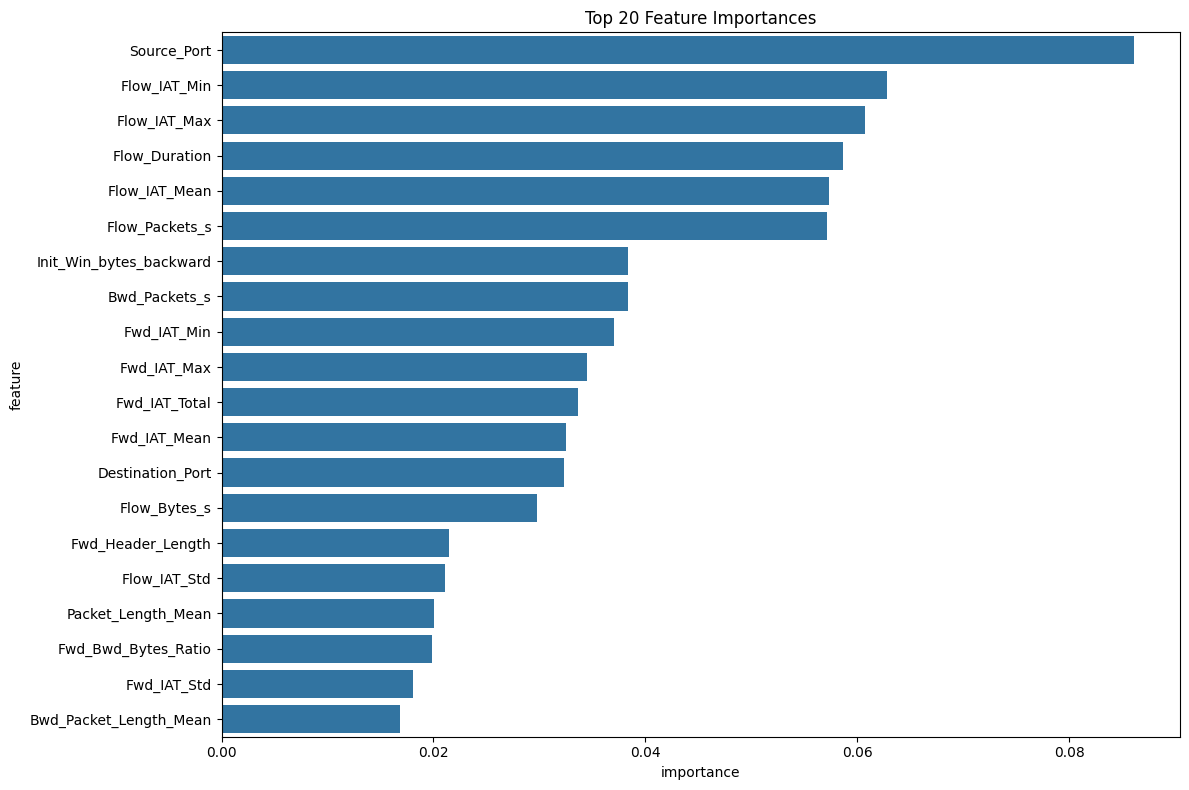

In [ ]:
# 18. Feature importance and selection
print("\nCalculating feature importance with Random Forest...")
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_selector.fit(X_train_resampled, y_train_resampled)

# Get and plot feature importances
feature_importances = pd.DataFrame(
    {'feature': X_train.columns, 'importance': rf_selector.feature_importances_}
).sort_values('importance', ascending=False)

print("Top 15 most important features:")
print(feature_importances.head(15))

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(20))
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.savefig('feature_importance.png')

In [ ]:
# Select top features
num_features_to_keep = min(30, len(feature_importances))  # Keep up to 30 features
top_features = feature_importances['feature'].values[:num_features_to_keep]
X_train_selected = X_train_resampled[top_features]
X_test_selected = X_test_scaled[top_features]

print(f"Training with {len(top_features)} selected features")

Training with 30 selected features


In [ ]:
# 19. Random Forest Model
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_selected, y_train_resampled)

# Evaluate on test set
y_pred_rf = rf_model.predict(X_test_selected)
y_pred_proba_rf = rf_model.predict_proba(X_test_selected)[:, 1]

print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Training Random Forest model...

Random Forest Results:
Accuracy: 0.8028

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83     23861
           1       0.77      0.75      0.76     16571

    accuracy                           0.80     40432
   macro avg       0.80      0.79      0.80     40432
weighted avg       0.80      0.80      0.80     40432



In [ ]:
# 20. Gradient Boosting Model
print("\nTraining Gradient Boosting model...")
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb_model.fit(X_train_selected, y_train_resampled)

# Evaluate
y_pred_gb = gb_model.predict(X_test_selected)
y_pred_proba_gb = gb_model.predict_proba(X_test_selected)[:, 1]

print("\nGradient Boosting Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))


Training Gradient Boosting model...

Gradient Boosting Results:
Accuracy: 0.6837

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74     23861
           1       0.62      0.59      0.61     16571

    accuracy                           0.68     40432
   macro avg       0.67      0.67      0.67     40432
weighted avg       0.68      0.68      0.68     40432



In [ ]:
# 21. Deep Learning Model
print("\nTraining Deep Learning model...")
def build_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC()]
    )
    return model

# Create and train the model
dl_model = build_model(X_train_selected.shape[1])

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = dl_model.fit(
    X_train_selected, y_train_resampled,
    epochs=1000,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate
y_pred_proba_dl = dl_model.predict(X_test_selected)
y_pred_dl = (y_pred_proba_dl > 0.5).astype(int).flatten()

print("\nDeep Learning Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dl):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dl))


Training Deep Learning model...
Epoch 1/1000
2387/2387 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5673 - auc_3: 0.5077 - loss: 0.7320 - val_accuracy: 0.1445 - val_auc_3: 0.5340 - val_loss: 0.8227
Epoch 2/1000
2387/2387 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.5899 - auc_3: 0.5355 - loss: 0.6757 - val_accuracy: 0.1392 - val_auc_3: 0.5080 - val_loss: 0.8087
Epoch 3/1000
2387/2387 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.5919 - auc_3: 0.5606 - loss: 0.6713 - val_accuracy: 0.1391 - val_auc_3: 0.5053 - val_loss: 0.8357
Epoch 4/1000
2387/2387 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.5944 - auc_3: 0.5740 - loss: 0.6685 - val_accuracy: 0.1389 - val_auc_3: 0.5431 - val_loss: 0.8394
Epoch 5/1000
2387/2387 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.5966 - auc_3: 0.5832 - loss: 0.6658 - val_accuracy: 0.1423 - val_auc_3: 0.5719 - val_loss: 3.3234
Epoch 6/1000
2387/2387 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.5981 - auc_3: 0.5866 - loss: 0.6652 - val_accuracy:


Training Deep Learning model...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 53,921 (210.63 KB)

 Trainable params: 52,901 (206.64 KB)

 Non-trainable params: 1,020 (3.98 KB)

None
Epoch 1/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - accuracy: 0.5898 - auc_1: 0.4970 - loss: 0.6810 - val_accuracy: 0.1389 - val_auc_1: 0.5000 - val_loss: 0.8634 - learning_rate: 0.0500
Epoch 2/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.5896 - auc_1: 0.4996 - loss: 0.6782 - val_accuracy: 0.1390 - val_auc_1: 0.5008 - val_loss: 0.8640 - learning_rate: 0.0500
Epoch 3/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.5882 - auc_1: 0.4996 - loss: 0.6786 - val_accuracy: 0.1389 - val_auc_1: 0.4997 - val_loss: 52.6341 - learning_rate: 0.0500
Epoch 4/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.5901 - auc_1: 0.4987 - loss: 0.6782 - val_accuracy: 0.1395 - val_auc_1: 0.5000 - val_loss: 0.8801 - learning_rate: 0.0500
Epoch 5/100
4773/4773 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.5902 - auc_1: 0.4973 - loss: 0.6783 - val_accuracy: 0.1389 - val_auc_1: 0.5013 - val_loss: 634.2457 - learning_rate: 0.0500
Epoch 6/100
4773/4773 ━━━━━━━━━━

Model muvaffaqiyatli saqlandi: 'final_dl_model.h5'


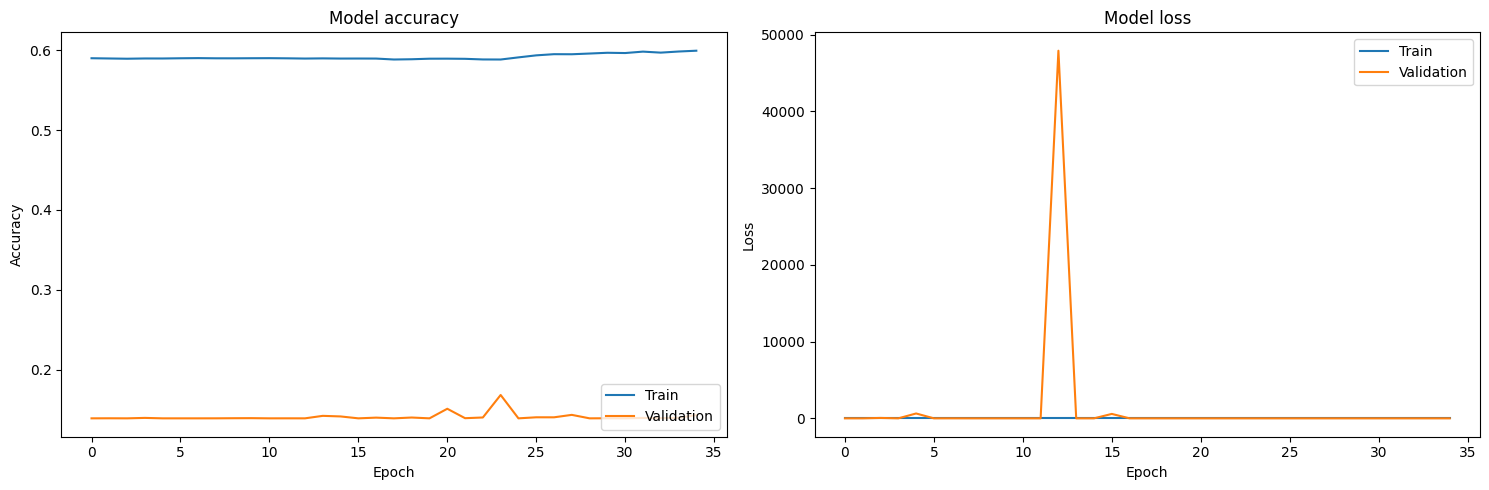

In [ ]:
# 21. Deep Learning Model - xatolikni to'g'rilash
print("\nTraining Deep Learning model...")
def build_improved_model(input_shape):
    model = Sequential([
        # Input qatlam
        Dense(256, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.3),

        # Birinchi yashirin qatlam
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        # Ikkinchi yashirin qatlam
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        # Uchinchi yashirin qatlam
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(16, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(8, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(4, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(2, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        # Chiqish qatlami
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC()]
    )
    return model

# Modelni qurish
dl_model = build_improved_model(X_train_selected.shape[1])
print(dl_model.summary())

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True  # Bu eng muhim parametr - eng yaxshi holatni saqlab qoladi
)

# Learning rate ni kamaytirib borish
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=0.00001,
    verbose=1
)

# Modelni o'qitish - ModelCheckpoint callbackni olib tashladik
history = dl_model.fit(
    X_train_selected, y_train_resampled,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],  # ModelCheckpoint olib tashlandi
    verbose=1
)

# Xatolikni oldini olish uchun load_model qismini olib tashladik
# O'rniga, early_stopping restore_best_weights=True parametri
# orqali eng yaxshi modelni saqlaymiz

# Baholash
y_pred_proba_dl = dl_model.predict(X_test_selected)
y_pred_dl = (y_pred_proba_dl > 0.5).astype(int).flatten()

print("\nDeep Learning Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dl):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dl))

# O'qitish jarayonini vizuallash
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.savefig('dl_training_history.png')

# Ixtiyoriy: modelni qo'lda saqlash
try:
    dl_model.save('final_dl_model.h5')
    print("Model muvaffaqiyatli saqlandi: 'final_dl_model.h5'")
except Exception as e:
    print(f"Modelni saqlashda xatolik: {e}")
    # Modelni boshqa format (SavedModel) da saqlashga urinish
    try:
        dl_model.save('final_dl_model')
        print("Model SavedModel formatida saqlandi: 'final_dl_model'")
    except Exception as e2:
        print(f"Yana xatolik: {e2}")

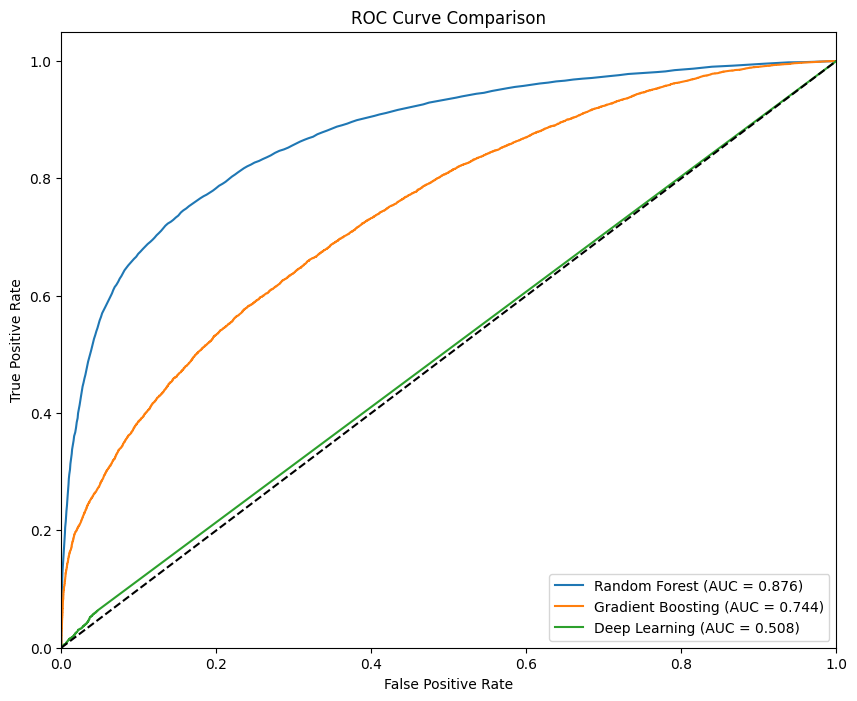

In [ ]:
# 22. Plot ROC curves for comparison
plt.figure(figsize=(10, 8))

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')

# Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.3f})')

# Deep Learning
fpr_dl, tpr_dl, _ = roc_curve(y_test, y_pred_proba_dl)
roc_auc_dl = auc(fpr_dl, tpr_dl)
plt.plot(fpr_dl, tpr_dl, label=f'Deep Learning (AUC = {roc_auc_dl:.3f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.savefig('roc_comparison.png')

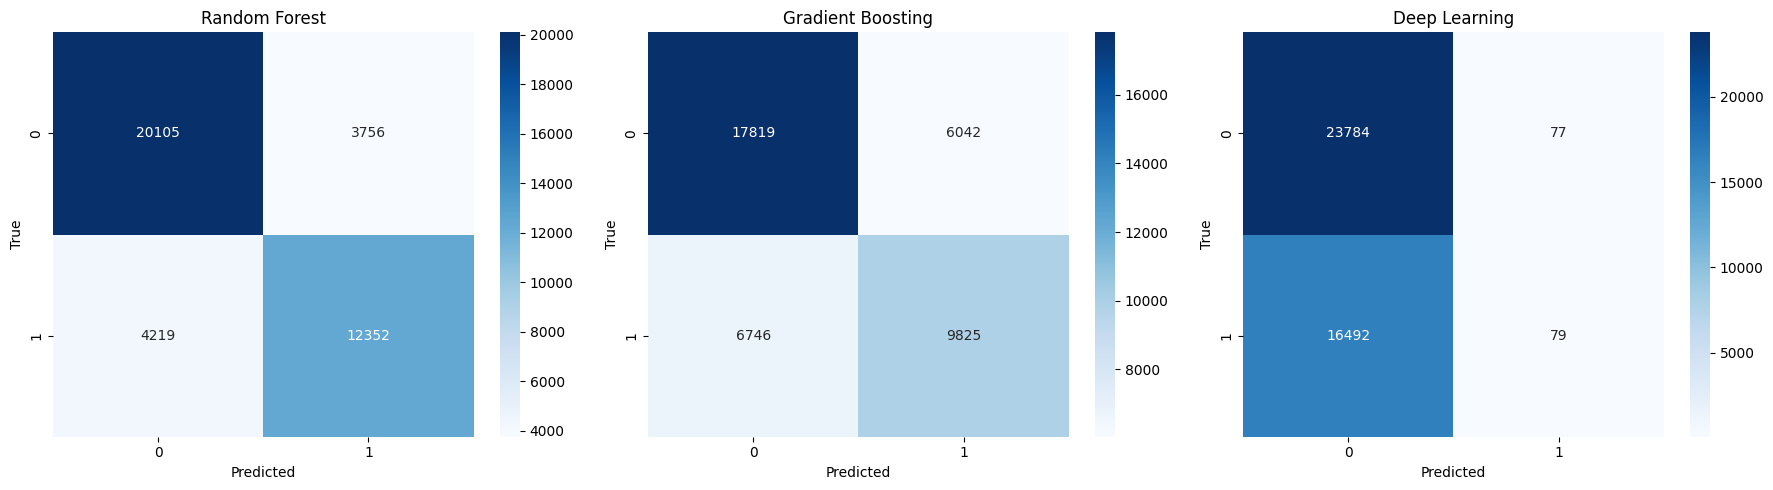

In [ ]:
# 23. Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Gradient Boosting')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

# Deep Learning
cm_dl = confusion_matrix(y_test, y_pred_dl)
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Deep Learning')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

plt.tight_layout()
plt.savefig('confusion_matrices.png')

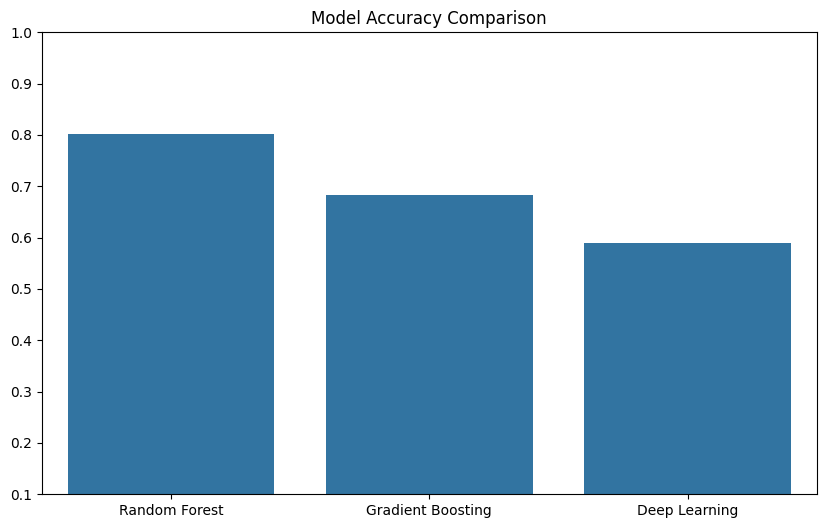

In [ ]:
# 24. Compare model performances
models = ['Random Forest', 'Gradient Boosting', 'Deep Learning']
accuracies = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_gb),
    accuracy_score(y_test, y_pred_dl)
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylim(0.1, 1)
plt.savefig('model_comparison.png')

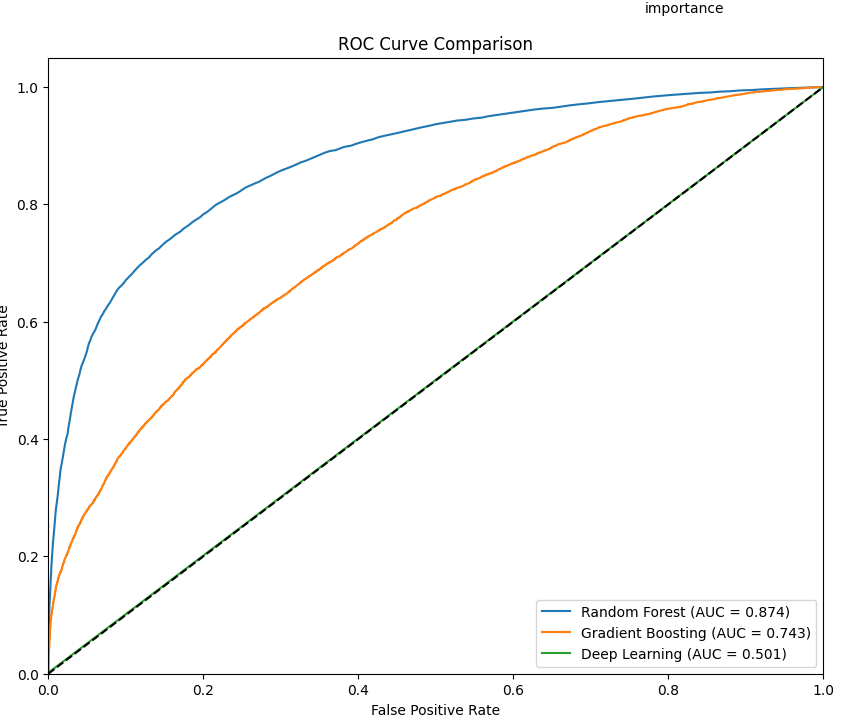

In [ ]:
# 25. Save the best model
import joblib

print("\nSaving the best model...")
best_auc = max(roc_auc_rf, roc_auc_gb, roc_auc_dl)

if best_auc == roc_auc_rf:
    joblib.dump(rf_model, 'best_keylogger_model.pkl')
    joblib.dump(list(top_features), 'selected_features.pkl')
    joblib.dump(scaler, 'feature_scaler.pkl')
    print("Random Forest saved as the best model")
elif best_auc == roc_auc_gb:
    joblib.dump(gb_model, 'best_keylogger_model.pkl')
    joblib.dump(list(top_features), 'selected_features.pkl')
    joblib.dump(scaler, 'feature_scaler.pkl')
    print("Gradient Boosting saved as the best model")
else:
    dl_model.save('best_keylogger_model.h5')
    joblib.dump(list(top_features), 'selected_features.pkl')
    joblib.dump(scaler, 'feature_scaler.pkl')
    print("Deep Learning saved as the best model")

print("Model saved successfully!")


Saving the best model...
Random Forest saved as the best model
Model saved successfully!
